# Train Data

*Data Cleaning and Preprocessing*

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [141]:
df=pd.read_csv('Assignment_Train.csv')
df.head()

,DEALER ID,APPLICATION LOGIN DATE,HDB BRANCH NAME,HDB BRANCH STATE,FIRST NAME,MIDDLE NAME,LAST NAME,mobile,AADHAR VERIFIED,Cibil Score,...,Phone Social Premium.shaadi,Phone Social Premium.skype,Phone Social Premium.toi,Phone Social Premium.whatsapp,Phone Social Premium.yatra,Phone Social Premium.zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application Status
0,106989,07/20/2022,DELHI-SF,DELHI,SUNIL,NaN,CHANDER,9210574080,NO,726,...,0.0,0.0,1.0,NaN,NaN,0.0,5324.0,67.222222,High,APPROVED
1,108975,07/28/2022,PATNA-SF,BIHAR,AMRIT,NaN,KUMAR,8877987018,NO,NaN,...,0.0,0.0,0.0,NaN,NaN,0.0,1998.0,100.000000,High,APPROVED
2,111004,07/15/2022,DARJEELING-SF,WEST BENGAL,ANIMESH,NaN,THAPA,8910862135,NO,737,...,0.0,0.0,0.0,NaN,NaN,0.0,-1.0,-1.000000,Low,APPROVED
3,192020,07/04/22,SAHARANPUR-SF,UTTAR PRADESH,ADITYA,NaN,SINGH,9758428017,NO,713,...,0.0,0.0,1.0,NaN,NaN,0.0,1998.0,72.777778,High,APPROVED
4,55095,07/15/2022,MODASA-SF,GUJARAT,PARMAR,HARESHBHAI,AMRUTBHAI,9687028486,NO,669,...,0.0,0.0,1.0,NaN,NaN,0.0,1998.0,68.095238,High,DECLINED


*Irrelevant data columns dropping*

In [142]:
df.drop(['APPLICATION LOGIN DATE','HDB BRANCH NAME','FIRST NAME','MIDDLE NAME','LAST NAME'],axis=1,inplace=True)

In [143]:
df.drop('upi_name',axis=1,inplace=True)

In [144]:
df.drop(['name','Personal Email Address','Pan Name','EMPLOYER NAME','DOB','Personal Email Address','mobile'],axis=1,inplace=True)

In [145]:
df.head()

,DEALER ID,HDB BRANCH STATE,AADHAR VERIFIED,Cibil Score,MOBILE VERIFICATION,DEALER NAME,TOTAL ASSET COST,ASSET CTG,ASSET MODEL NO,APPLIED AMOUNT,...,Phone Social Premium.shaadi,Phone Social Premium.skype,Phone Social Premium.toi,Phone Social Premium.whatsapp,Phone Social Premium.yatra,Phone Social Premium.zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application Status
0,106989,DELHI,NO,726,True,V D AUTO WHEELS CHHOTIAL,95041.0,MCEXA,139542,85000,...,0.0,0.0,1.0,NaN,NaN,0.0,5324.0,67.222222,High,APPROVED
1,108975,BIHAR,NO,NaN,True,CHANDAN AUTOMOBILES 259 KGS TOWER,NaN,NaN,140208,90000,...,0.0,0.0,0.0,NaN,NaN,0.0,1998.0,100.000000,High,APPROVED
2,111004,WEST BENGAL,NO,737,True,KN VISION 53HILL CART ROAD,119436.0,SCEXA,160001,75000,...,0.0,0.0,0.0,NaN,NaN,0.0,-1.0,-1.000000,Low,APPROVED
3,192020,UTTAR PRADESH,NO,713,True,MAHADEV AUTOMOBILES MANGLAUR,87000.0,MCECA,160832,78500,...,0.0,0.0,1.0,NaN,NaN,0.0,1998.0,72.777778,High,APPROVED
4,55095,GUJARAT,NO,669,True,DWARKESH AUTO SHAMLAJI ROAD,NaN,NaN,174641,70000,...,0.0,0.0,1.0,NaN,NaN,0.0,1998.0,68.095238,High,DECLINED


In [146]:
df.isna().sum()

,0
DEALER ID,0
HDB BRANCH STATE,854
AADHAR VERIFIED,0
Cibil Score,4297
MOBILE VERIFICATION,0
DEALER NAME,4
TOTAL ASSET COST,5108
ASSET CTG,5108
ASSET MODEL NO,0
APPLIED AMOUNT,0


*Data Amputation*

In [147]:
df['Cibil Score'] = pd.to_numeric(df['Cibil Score'], errors='coerce')

In [148]:
def fill_missing_values(col):
    if col.dtype == 'object':
        return col.fillna('Not available')
    else:
        return col.fillna(col.mean())


df = df.apply(fill_missing_values)


In [149]:
df.head()

,DEALER ID,HDB BRANCH STATE,AADHAR VERIFIED,Cibil Score,MOBILE VERIFICATION,DEALER NAME,TOTAL ASSET COST,ASSET CTG,ASSET MODEL NO,APPLIED AMOUNT,...,Phone Social Premium.shaadi,Phone Social Premium.skype,Phone Social Premium.toi,Phone Social Premium.whatsapp,Phone Social Premium.yatra,Phone Social Premium.zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application Status
0,106989,DELHI,NO,726.000000,True,V D AUTO WHEELS CHHOTIAL,95041.000000,MCEXA,139542,85000,...,0.0,0.0,1.0,0.854418,0.0,0.0,5324.0,67.222222,High,APPROVED
1,108975,BIHAR,NO,706.402118,True,CHANDAN AUTOMOBILES 259 KGS TOWER,97612.518397,Not available,140208,90000,...,0.0,0.0,0.0,0.854418,0.0,0.0,1998.0,100.000000,High,APPROVED
2,111004,WEST BENGAL,NO,737.000000,True,KN VISION 53HILL CART ROAD,119436.000000,SCEXA,160001,75000,...,0.0,0.0,0.0,0.854418,0.0,0.0,-1.0,-1.000000,Low,APPROVED
3,192020,UTTAR PRADESH,NO,713.000000,True,MAHADEV AUTOMOBILES MANGLAUR,87000.000000,MCECA,160832,78500,...,0.0,0.0,1.0,0.854418,0.0,0.0,1998.0,72.777778,High,APPROVED
4,55095,GUJARAT,NO,669.000000,True,DWARKESH AUTO SHAMLAJI ROAD,97612.518397,Not available,174641,70000,...,0.0,0.0,1.0,0.854418,0.0,0.0,1998.0,68.095238,High,DECLINED


In [150]:
df.isna().sum()

,0
DEALER ID,0
HDB BRANCH STATE,0
AADHAR VERIFIED,0
Cibil Score,0
MOBILE VERIFICATION,0
DEALER NAME,0
TOTAL ASSET COST,0
ASSET CTG,0
ASSET MODEL NO,0
APPLIED AMOUNT,0


*EDA*

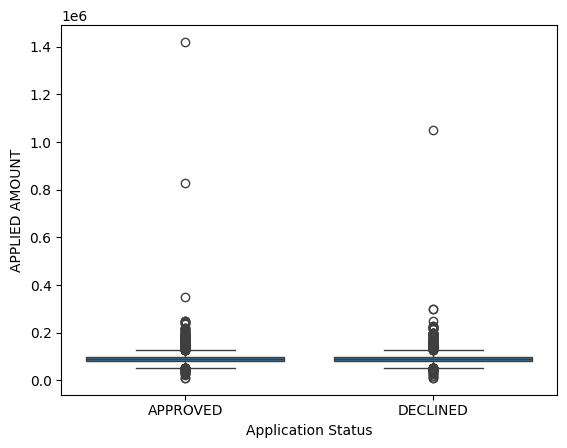

In [151]:
sns.boxplot(x='Application Status', y='APPLIED AMOUNT', data=df)
plt.show()
# Shows the amount of Loans Approved or Declined based on Applied Amount

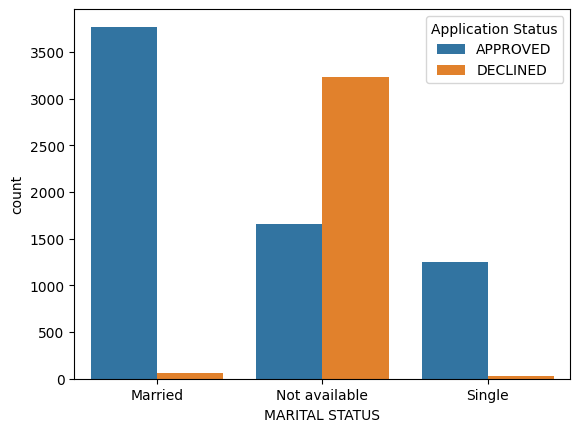

In [152]:
sns.countplot(x='MARITAL STATUS', hue='Application Status', data=df)
plt.show()


This Indicated Whose Maritial status is not provided have a higher chances of disapproval of their loans

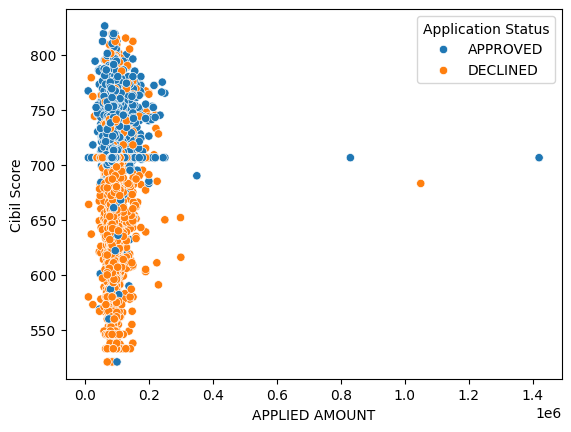

In [153]:
sns.scatterplot(x='APPLIED AMOUNT', y='Cibil Score',hue='Application Status',data=df)
plt.show()

*Label Encoding*

In [154]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

def convert(col):
    if col.dtype in ['object','bool']:
        return le.fit_transform(col)
    else:
        return col

df = df.apply(convert)


In [155]:
df.head()

,DEALER ID,HDB BRANCH STATE,AADHAR VERIFIED,Cibil Score,MOBILE VERIFICATION,DEALER NAME,TOTAL ASSET COST,ASSET CTG,ASSET MODEL NO,APPLIED AMOUNT,...,Phone Social Premium.shaadi,Phone Social Premium.skype,Phone Social Premium.toi,Phone Social Premium.whatsapp,Phone Social Premium.yatra,Phone Social Premium.zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application Status
0,106989,4,0,726.000000,0,2306,95041.000000,7,139542,85000,...,0.0,0.0,1.0,0.854418,0.0,0.0,5324.0,67.222222,0,0
1,108975,2,0,706.402118,0,394,97612.518397,11,140208,90000,...,0.0,0.0,0.0,0.854418,0.0,0.0,1998.0,100.000000,0,0
2,111004,24,0,737.000000,0,917,119436.000000,13,160001,75000,...,0.0,0.0,0.0,0.854418,0.0,0.0,-1.0,-1.000000,1,0
3,192020,22,0,713.000000,0,1069,87000.000000,4,160832,78500,...,0.0,0.0,1.0,0.854418,0.0,0.0,1998.0,72.777778,0,0
4,55095,5,0,669.000000,0,522,97612.518397,11,174641,70000,...,0.0,0.0,1.0,0.854418,0.0,0.0,1998.0,68.095238,0,1


*Model Training*

RF

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


rf_model.fit(X_train, y_train)

# Predict the test set results
y_pred = rf_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 87.37%
Confusion Matrix:
[[1800  195]
 [ 184  821]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1995
           1       0.81      0.82      0.81      1005

    accuracy                           0.87      3000
   macro avg       0.86      0.86      0.86      3000
weighted avg       0.87      0.87      0.87      3000



Adaboost

In [157]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

base_clf = DecisionTreeClassifier(max_depth=1)  # Weak learner


ada_model = AdaBoostClassifier(base_estimator=base_clf, n_estimators=50, random_state=42)


ada_model.fit(X_train, y_train)

# Predict the test set results
y_pred = ada_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 87.43%
Confusion Matrix:
[[1827  168]
 [ 209  796]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1995
           1       0.83      0.79      0.81      1005

    accuracy                           0.87      3000
   macro avg       0.86      0.85      0.86      3000
weighted avg       0.87      0.87      0.87      3000



# Test Data Predictions

In [158]:
test=pd.read_csv('Assignment_Test.csv')
test.head()

,UID,DEALER ID,APPLICATION LOGIN DATE,HDB BRANCH NAME,HDB BRANCH STATE,FIRST NAME,MIDDLE NAME,LAST NAME,mobile,AADHAR VERIFIED,...,Phone Social Premium.rummycircle,Phone Social Premium.shaadi,Phone Social Premium.skype,Phone Social Premium.toi,Phone Social Premium.whatsapp,Phone Social Premium.yatra,Phone Social Premium.zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall
0,1844045271814558464,105615,07/12/22,HUBLI-SF,NaN,VENUGOPAL,H,BHARADHVAJ,7019759674,NO,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,676,100.0,Medium
1,1840349097823778816,91593,07/14/2022,SATNA-SF,MADHYA PRADESH,SHIVDHAR,NaN,CHAUDHARY,7697884828,NO,...,NaN,0.0,0.0,NaN,0.0,NaN,0.0,897,-1.0,Low
2,1488102613362294272,74152,07/07/22,LUCKNOW-SF,UTTAR PRADESH,MANISH,NaN,VERMA,8840079825,NO,...,NaN,0.0,1.0,0.0,1.0,NaN,0.0,839,100.0,Medium
3,555529923942874624,110164,07/13/2022,KOLLAM-SF,KERALA,DEEPU,RAVEENDRAN,RAVEENDRAN,8089276854,NO,...,NaN,0.0,0.0,0.0,NaN,NaN,0.0,2050,-1.0,Low
4,1010213070486150912,113037,07/08/22,PURI-SF,ORISSA,AKASHA,NaN,PRADHAN,9337511958,NO,...,NaN,0.0,0.0,0.0,NaN,NaN,0.0,-1,-1.0,Very Low


In [159]:
test.drop(['APPLICATION LOGIN DATE','HDB BRANCH NAME','FIRST NAME','MIDDLE NAME','LAST NAME'],axis=1,inplace=True)
test.drop(['name','Personal Email Address','Pan Name','EMPLOYER NAME','DOB','Personal Email Address','mobile','upi_name'],axis=1,inplace=True)


In [160]:
test['Cibil Score'] = pd.to_numeric(test['Cibil Score'], errors='coerce')
def fill_missing_values(col):
    if col.dtype == 'object':
        return col.fillna('Not available')
    else:
        return col.fillna(col.mean())


test = test.apply(fill_missing_values)

In [161]:
test=test.fillna(0)

In [162]:
test.isna().sum()

,0
UID,0
DEALER ID,0
HDB BRANCH STATE,0
AADHAR VERIFIED,0
Cibil Score,0
MOBILE VERIFICATION,0
DEALER NAME,0
TOTAL ASSET COST,0
ASSET CTG,0
ASSET MODEL NO,0


In [163]:
test=test.apply(convert)

In [164]:
test.head()

,UID,DEALER ID,HDB BRANCH STATE,AADHAR VERIFIED,Cibil Score,MOBILE VERIFICATION,DEALER NAME,TOTAL ASSET COST,ASSET CTG,ASSET MODEL NO,...,Phone Social Premium.rummycircle,Phone Social Premium.shaadi,Phone Social Premium.skype,Phone Social Premium.toi,Phone Social Premium.whatsapp,Phone Social Premium.yatra,Phone Social Premium.zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall
0,1844045271814558464,105615,13,0,757.000000,0,856,95352.000000,11,143241,...,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,676,100.0,2
1,1840349097823778816,91593,11,0,750.000000,0,1140,75371.000000,9,166536,...,0.0,0.0,0.0,0.246384,0.00000,0.0,0.0,897,-1.0,1
2,1488102613362294272,74152,22,0,710.000000,0,401,94983.000000,11,134123,...,0.0,0.0,1.0,0.000000,1.00000,0.0,0.0,839,100.0,2
3,555529923942874624,110164,10,0,695.000000,0,304,97679.605317,10,143627,...,0.0,0.0,0.0,0.000000,0.79771,0.0,0.0,2050,-1.0,1
4,1010213070486150912,113037,14,0,706.444541,0,507,90277.000000,3,143948,...,0.0,0.0,0.0,0.000000,0.79771,0.0,0.0,-1,-1.0,5


In [165]:
s=test['UID']

In [166]:
test.drop('UID',axis=1,inplace=True)

*Predictions*

In [169]:
pred = ada_model.predict(test)

In [170]:
predictions = pd.DataFrame({
    'UID': s,
    'Predictions': pred
})

In [173]:
predictions.replace(0,'DECLINED',inplace=True)
predictions.replace(1,'APPROVED',inplace=True)

In [174]:
predictions['Predictions'].value_counts()

,count
Predictions,
DECLINED,1956
APPROVED,44


In [175]:
predictions.to_csv('predictions.csv', index=False)